<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_1-3/blob/main/Practica_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1.3 (Transformada de Hough y Etiquetado de componentes conectados)**

In [ ]:
!pip install anytree

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from anytree import Node, RenderTree

Raiz
├── Padre: 100
│   ├── Union: 1
│   ├── Union: 2
│   ├── Union: 3
│   ├── Union: 4
│   ├── Union: 5
│   ├── Union: 6
│   ├── Union: 7
│   ├── Union: 8
│   ├── Union: 9
│   ├── Union: 10
│   ├── Union: 11
│   ├── Union: 12
│   ├── Union: 13
│   ├── Union: 14
│   ├── Union: 15
│   ├── Union: 16
│   ├── Union: 17
│   ├── Union: 18
│   ├── Union: 19
│   ├── Union: 20
│   ├── Union: 21
│   ├── Union: 22
│   ├── Union: 23
│   ├── Union: 24
│   ├── Union: 25
│   ├── Union: 26
│   ├── Union: 27
│   ├── Union: 28
│   ├── Union: 29
│   ├── Union: 30
│   ├── Union: 31
│   ├── Union: 32
│   ├── Union: 33
│   ├── Union: 34
│   ├── Union: 35
│   ├── Union: 36
│   ├── Union: 37
│   ├── Union: 38
│   ├── Union: 39
│   ├── Union: 40
│   ├── Union: 41
│   ├── Union: 42
│   ├── Union: 43
│   ├── Union: 44
│   ├── Union: 45
│   ├── Union: 46
│   ├── Union: 47
│   ├── Union: 48
│   ├── Union: 49
│   ├── Union: 50
│   ├── Union: 51
│   ├── Union: 52
│   ├── Union: 53
│   ├── Union: 54
│   ├── Union: 55

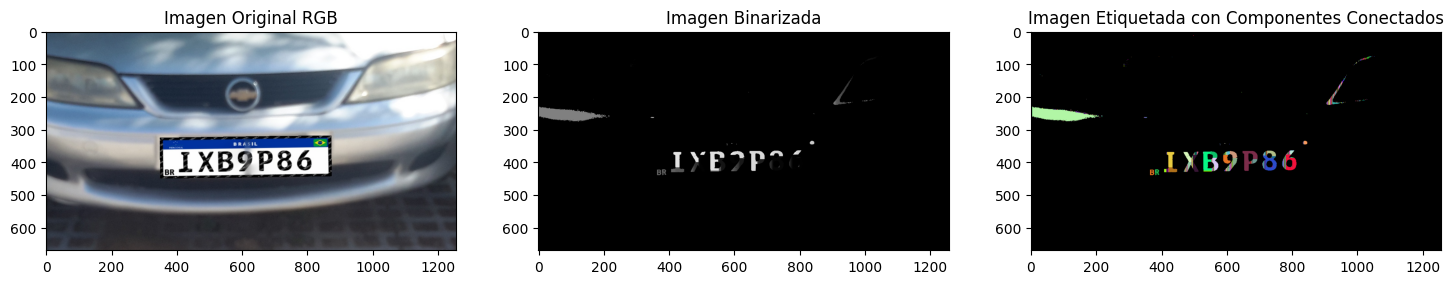

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from anytree import Node, RenderTree


def find(parent, i):
    if parent[i] == -1:
        return i
    return find(parent, parent[i])

def union(parent, x, y):
    x_set = find(parent, x)
    y_set = find(parent, y)
    if x_set != y_set:
        parent[x_set] = y_set

def build_component_tree(imagen_binarizada):
    height, width = imagen_binarizada.shape
    parent = [-1] * (height * width)
    component_colors = {}

    component_count = 0

    for y in range(height):
        for x in range(width):
            if imagen_binarizada[y, x] == 255:
                neighbors = []
                if x > 0:
                    neighbors.append((y, x - 1))
                if y > 0:
                    neighbors.append((y - 1, x))

                if not neighbors:
                    component_count += 1
                    component_colors[component_count] = np.random.randint(0, 256, 3)
                    imagen_binarizada[y, x] = component_count

                else:
                    neighbor_labels = []
                    for neighbor_y, neighbor_x in neighbors:
                        neighbor_label = imagen_binarizada[neighbor_y, neighbor_x]
                        if neighbor_label != 0:
                            neighbor_labels.append(neighbor_label)

                    if not neighbor_labels:
                        component_count += 1
                        component_colors[component_count] = np.random.randint(0, 256, 3)
                        imagen_binarizada[y, x] = component_count
                    else:
                        min_label = min(neighbor_labels)
                        imagen_binarizada[y, x] = min_label
                        for label in neighbor_labels:
                            if label != min_label:
                                union(parent, label, min_label)

    # Crear nodos solo para las etiquetas presentes en la imagen
    component_nodes = {}
    root = Node("Raiz")
    for i in range(1, component_count + 1):
        if np.any(imagen_binarizada == i):
            parent_label = find(parent, i)
            if parent_label not in component_nodes:
                component_nodes[parent_label] = Node(f'Padre: {parent_label}', parent=root)
            if i != parent_label:
                parent_node = component_nodes[parent_label]
                component_nodes[i] = Node(f'Union: {i}', parent=parent_node)

    return root, component_nodes

def print_component_tree(root):
    for pre, _, node in RenderTree(root):
        print(f"{pre}{node.name}")

def label_connected_components(image_path):
    imagen = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Leer la imagen en formato RGB
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
    _, imagen_binarizada1 = cv2.threshold(imagen_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagen_binarizada1)

    tamano_maximo = 10000

    for label in range(1, num_labels):
        if stats[label, cv2.CC_STAT_AREA] > tamano_maximo:
            labels[labels == label] = 0

    imagen_binarizada = np.where(labels > 0, 255, 0).astype(np.uint8)

    component_tree, component_nodes = build_component_tree(imagen_binarizada)

    # Imprimir los componentes conectados en la consola
    print_component_tree(component_tree)

    # Crear una imagen en blanco del mismo tamaño
    colored_image = np.zeros((imagen_binarizada.shape[0], imagen_binarizada.shape[1], 3), dtype=np.uint8)

    # Asignar colores a los componentes en la imagen original
    for i in range(1, len(component_nodes) + 1):
        if i in component_nodes:
            mask = (imagen_binarizada == i)
            colored_image[mask] = np.random.randint(0, 256, 3)

    # Mostrar las imágenes en tres subplots
    plt.figure(figsize=(18, 6))

    # Subplot 1: Imagen original RGB
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original RGB')

    # Subplot 2: Imagen binarizada
    plt.subplot(1, 3, 2)
    plt.imshow(imagen_binarizada, cmap='gray')
    plt.title('Imagen Binarizada')

    # Subplot 3: Imagen etiquetada con componentes conectados
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Etiquetada con Componentes Conectados')

    plt.show()

image_path = 'placas/103.JPG'
label_connected_components(image_path)


# Práctica 1.3 (Transformada de Hough y Etiquetado de componentes conectados)

Ponemos las librerias necesarias

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

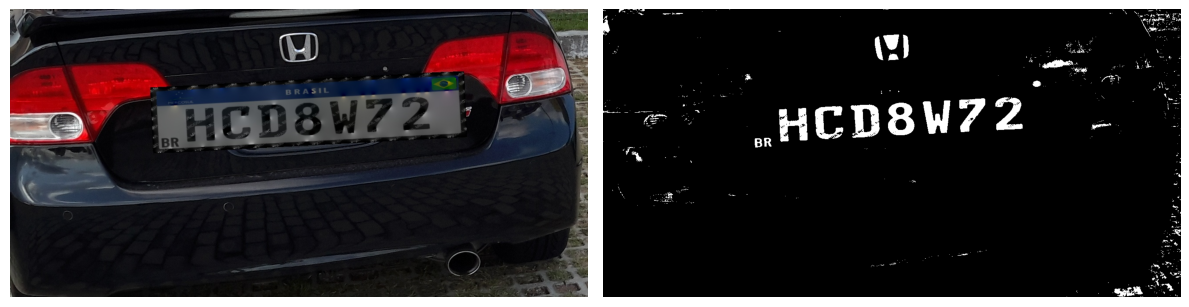

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('uno.jpg', cv2.IMREAD_COLOR)  # Leer la imagen en formato RGB

# Convertir la imagen original a escala de grises
imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar la binarización de Otsu con umbralización
_, imagen_binarizada1 = cv2.threshold(imagen_gray, 20, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Aplicar el algoritmo de etiquetado de componentes conectados
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(imagen_binarizada1)

tamano_maximo = 10000

for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] > tamano_maximo:
        labels[labels == label] = 0

imagen_binarizada = np.where(labels > 0, 255, 0).astype(np.uint8)

# Crear una figura con dos subplots para mostrar ambas imágenes
plt.figure(figsize=(12, 6))

# Subplot para la imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Subplot para la imagen binarizada invertida
plt.subplot(1, 2, 2)
plt.imshow(imagen_binarizada, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# New section

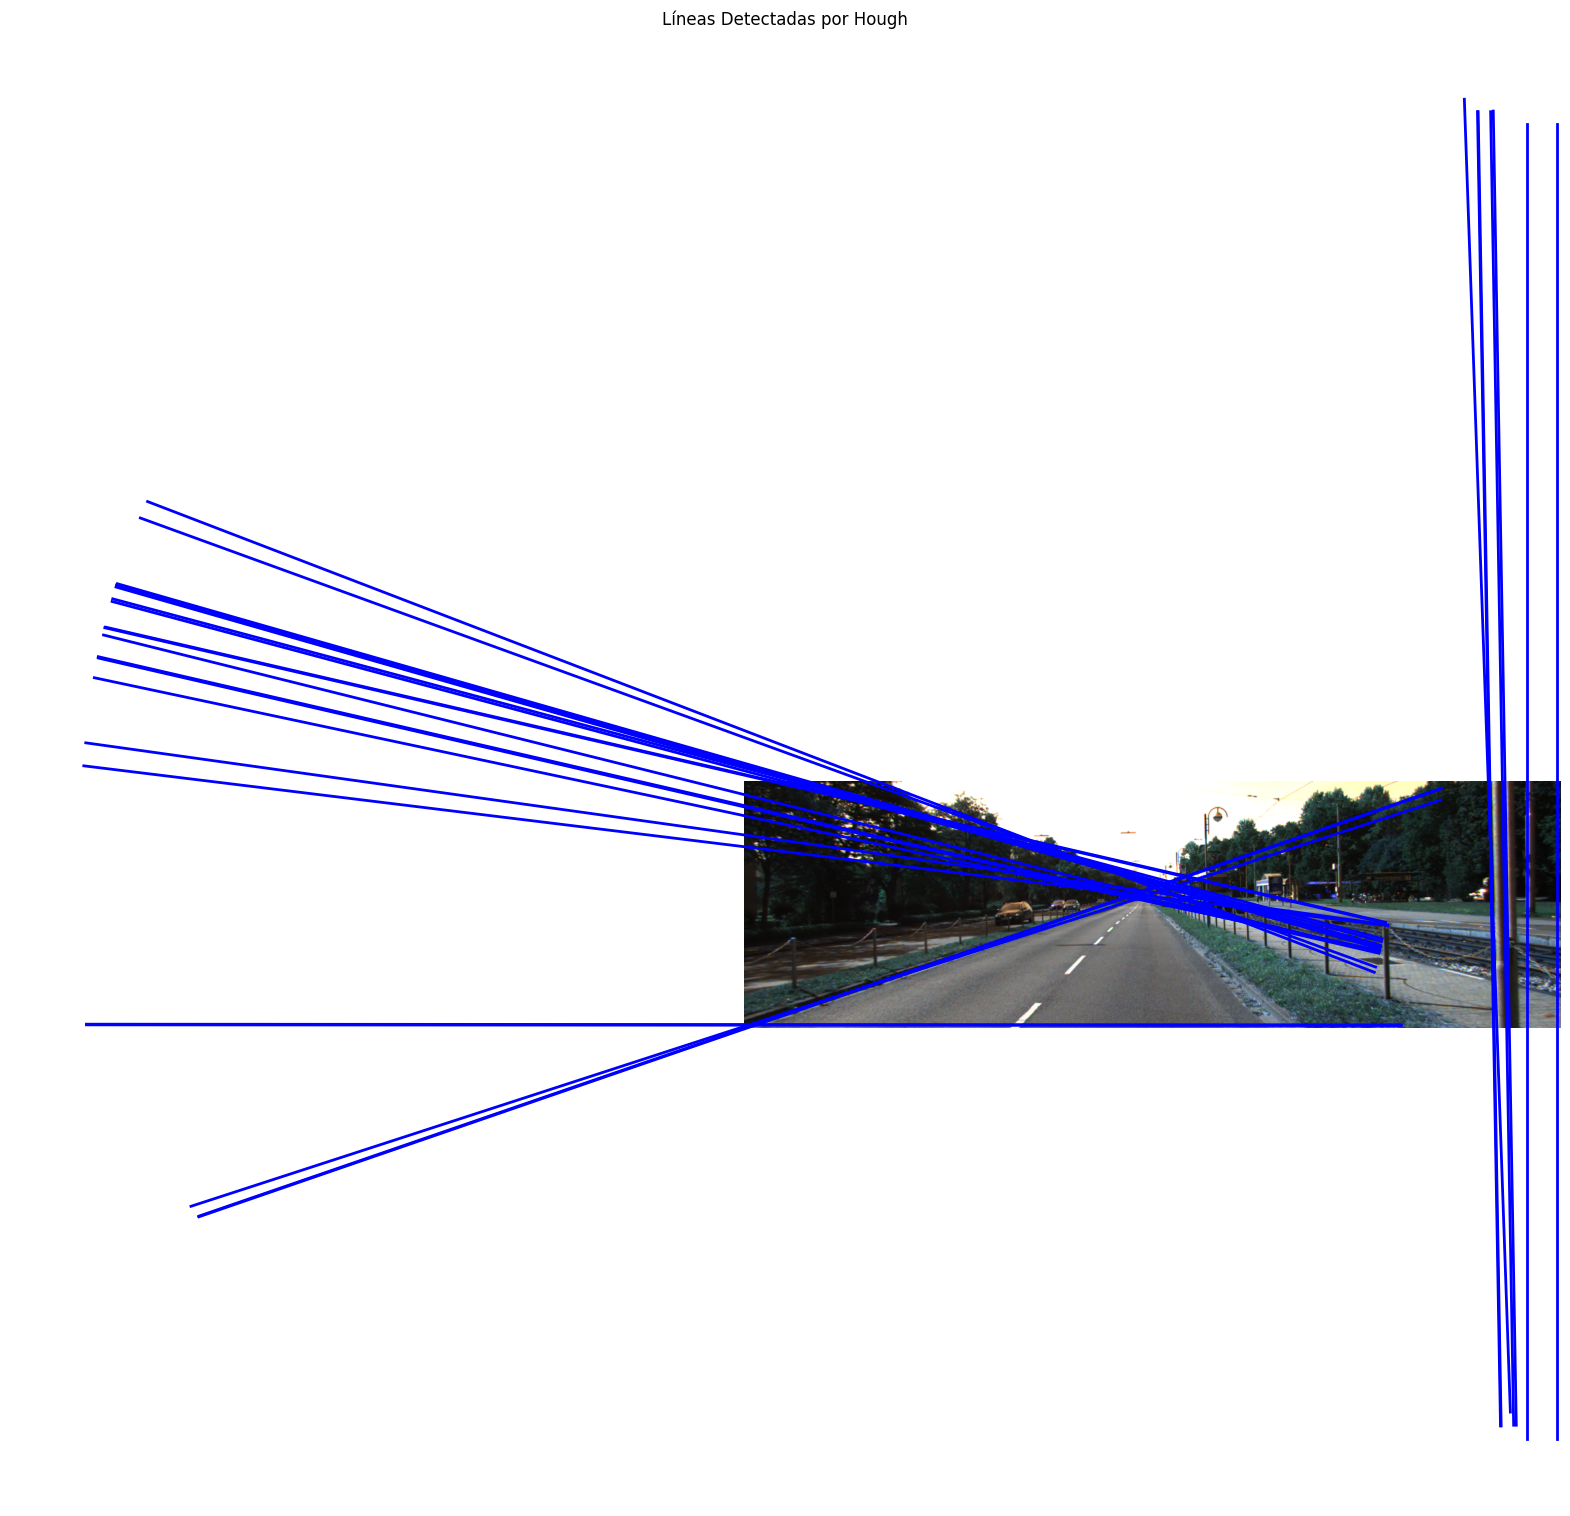

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Función para reducción de ruido mediante suavizado Gaussiano
def noise_reduction(grayscale_image, sigma, tamano_kernel):
    # Crear un kernel Gaussiano
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma ** 2)) * np.exp(
            -((x - (tamano_kernel - 1) / 2) ** 2 + (y - (tamano_kernel - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (tamano_kernel, tamano_kernel)
    )
    kernel = kernel / np.sum(kernel)  # Normalizar el kernel para que sume 1

    # Aplicar la convolución manualmente
    smoothed_image = np.zeros_like(grayscale_image, dtype=np.float64)
    grayscale_image = grayscale_image.astype(np.float64)

    for i in range(grayscale_image.shape[0] - tamano_kernel + 1):
        for j in range(grayscale_image.shape[1] - tamano_kernel + 1):
            ventana = grayscale_image[i:i + tamano_kernel, j:j + tamano_kernel]
            smoothed_image[i, j] = np.sum(ventana * kernel)

    # Convertir la imagen resultante a tipo uint8
    smoothed_image = smoothed_image.astype(np.uint8)

    return smoothed_image


# Función para calcular el gradiente de intensidad
def intensity_gradient(smoothed_image):
    Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
    Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
    [rows, columns] = np.shape(smoothed_image)
    sobel_gm_image = np.zeros(shape=(rows, columns))  # Inicialización del arreglo del gradiente de magnitud
    sobel_gd_image = np.zeros(shape=(rows, columns))  # Inicialización del arreglo del gradiente de dirección

    for i in range(rows - 2):
        for j in range(columns - 2):
            gx = np.sum(np.multiply(Gx, smoothed_image[i:i + 3, j:j + 3]))  # Dirección x
            gy = np.sum(np.multiply(Gy, smoothed_image[i:i + 3, j:j + 3]))  # Dirección y
            sobel_gm_image[i + 1, j + 1] = np.sqrt(
                gx ** 2 + gy ** 2)  # Calculamos la magnitud (mezclamos ambas direcciones)
            sobel_gd_image[i + 1, j + 1] = np.arctan2(gy, gx)

    return (sobel_gm_image, sobel_gd_image)


# Función para la supresión de no máximos
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)  # Crear una matriz de ceros para el resultado
    angle = D * 180. / np.pi  # Convertir la dirección del gradiente a grados
    angle[angle < 0] += 180  # Asegurarse de que los ángulos estén en el rango [0, 180]

    for i in range(1, M - 1):  # Recorrer filas (excepto los bordes)
        for j in range(1, N - 1):  # Recorrer columnas (excepto los bordes)
            try:
                q = 255  # Valor predeterminado para q
                r = 255  # Valor predeterminado para r

                # Comprobar la dirección del gradiente en el píxel actual
                # y determinar los píxeles vecinos correspondientes.

                # Ángulo 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j + 1]
                    r = img[i, j - 1]
                # Ángulo 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = img[i + 1, j - 1]
                    r = img[i - 1, j + 1]
                # Ángulo 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = img[i + 1, j]
                    r = img[i - 1, j]
                # Ángulo 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = img[i - 1, j - 1]
                    r = img[i + 1, j + 1]

                # Si el valor del píxel actual es mayor o igual que los vecinos,
                # se conserva en la matriz de salida (Z); de lo contrario, se establece en 0.
                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass  # Manejar excepciones de índice fuera de los bordes

    return Z  # Devolver la matriz resultante después de la supresión de no máximos


# Función para la umbralización
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    # Calcular los umbrales alto y bajo a partir de los ratios y el valor máximo en la imagen.
    highThreshold = img.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio

    M, N = img.shape  # Obtener las dimensiones de la imagen de entrada.
    res = np.zeros((M, N), dtype=np.int32)  # Crear una matriz de ceros para el resultado.

    # Definir valores para píxeles "débiles" y "fuertes".
    weak = np.int32(25)
    strong = np.int32(255)

    # Encontrar las coordenadas de los píxeles que superan el umbral alto.
    strong_i, strong_j = np.where(img >= highThreshold)

    # Encontrar las coordenadas de los píxeles que están por debajo del umbral bajo.
    zeros_i, zeros_j = np.where(img < lowThreshold)

    # Encontrar las coordenadas de los píxeles que están entre los umbrales alto y bajo.
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    # Asignar los valores "fuertes" a los píxeles que superan el umbral alto.
    res[strong_i, strong_j] = strong

    # Asignar los valores "débiles" a los píxeles que están entre los umbrales alto y bajo.
    res[weak_i, weak_j] = weak

    # Devolver la imagen resultante y los valores "débiles" y "fuertes".
    return (res, weak, strong)


# Función para la histeresis
def hysteresis(img, weak, strong=255):
    M, N = img.shape  # Obtener las dimensiones de la imagen de entrada.

    # Recorrer la imagen píxel por píxel (excepto los bordes).
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            if (img[i, j] == weak):  # Si el píxel actual es débil.
                try:
                    # Comprobar si alguno de los píxeles vecinos es fuerte.
                    if ((img[i + 1, j - 1] == strong) or (img[i + 1, j] == strong) or (img[i + 1, j + 1] == strong)
                            or (img[i, j - 1] == strong) or (img[i, j + 1] == strong)
                            or (img[i - 1, j - 1] == strong) or (img[i - 1, j] == strong) or (
                                    img[i - 1, j + 1] == strong)):
                        img[i, j] = strong  # Asignar el valor fuerte al píxel actual.
                    else:
                        img[i, j] = 0  # Si no hay vecinos fuertes, establecer el valor en 0.
                except IndexError as e:
                    pass  # Manejar excepciones de índice fuera de los bordes.

    return img  # Devolver la imagen después de aplicar el proceso de histeresis.


# Función para la detección de bordes Canny
def canny_detection(grayscale_image):
    # Paso 1: Aplicar suavizado Gaussiano
    tamano_kernel = 5  # Tamaño de la máscara (debe ser un número impar)
    sigma = 1  # Valor de sigma

    smoothed_image = noise_reduction(grayscale_image, sigma, tamano_kernel)

    # Paso 2: Calcular el gradiente
    sobel_gm_image, sobel_gd_image = intensity_gradient(smoothed_image)

    # Paso 3: Supresión de no máxima
    img_nms = non_max_suppression(sobel_gm_image, sobel_gd_image)

    # Paso 4: Umbralización histéresis
    img_thresh, weak, strong = threshold(img_nms, lowThresholdRatio=0.07, highThresholdRatio=0.19)
    canny_edges = hysteresis(img_thresh, weak, strong=strong)

    return canny_edges


# Función para la acumuladora de Hough
def hough_lines_acc(img, rho_resolution=1, theta_resolution=1):
    height, width = img.shape  # Altura y ancho para calcular la diagonal.
    img_diagonal = np.ceil(np.sqrt(height ** 2 + width ** 2))  # a**2 + b**2 = c**2
    rhos = np.arange(-img_diagonal, img_diagonal + 1, rho_resolution)  # rhos
    thetas = np.deg2rad(np.arange(-90, 90, theta_resolution))  # thetas

    # Crear el acumulador Hough con dimensiones iguales de rhos y thetas
    H = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # encontrar todos los píxeles de borde (no cero)

    for i in range(len(x_idxs)):  # Recorremos los puntos del borde
        x = x_idxs[i]
        y = y_idxs[i]

        for j in range(len(thetas)):  # Recorremos thetas y calcular rho
            rho = int((x * np.cos(thetas[j]) +
                       y * np.sin(thetas[j])) + img_diagonal)
            H[rho, j] += 1

    return H, rhos, thetas


# Función que combina la detección de bordes Canny y la detección de líneas con Hough
def detect_edges_and_lines(image_file, rho_resolution=1, theta_resolution=1):
    original_image = cv2.imread(image_file, 1)
    grayscale_image = cv2.imread(image_file, 0)

    # Detectar bordes utilizando Canny
    canny_edges = canny_detection(grayscale_image)

    # Detectar líneas rectas utilizando la transformada de Hough
    H, rhos, thetas = hough_lines_acc(canny_edges)

    return original_image, grayscale_image, canny_edges, H, rhos, thetas


# Nombre del archivo de imagen
image_file = 'um_000002.png'

# Detectar bordes y líneas
original_image, grayscale_image, canny_edges, H, rhos, thetas = detect_edges_and_lines(image_file)


# Crear una figura más grande
plt.figure(figsize=(20, 20))

# Mostrar solo las líneas detectadas por Hough
plt.imshow(original_image)
for i in range(len(thetas)):
    for j in range(len(rhos)):
        if H[j, i] > 100:  # Umbral para la detección de líneas
            rho = rhos[j]
            theta = thetas[i]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            plt.plot([x1, x2], [y1, y2], color='blue', linewidth=2)  # Utilizar un color válido, como 'blue'

plt.title('Líneas Detectadas por Hough')
plt.axis('off')
plt.show()